# Clustering

Clustering is a type of unsupervised learning. It is used to group data points that are similar to each other. In this notebook, we will use the KMeans algorithm to cluster passes to identify the most common types of passes that a team made.

In [4]:
from statsbombpy import sb

df = sb.events(match_id=3906390)

/Users/mckayjohns/miniforge3/envs/complete-football-analytics/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [6]:
df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflect

In [9]:
# Lets get just the columns we need
df = df[['team', 'type', 'player', 'location', 'pass_end_location']]

# Filter down to just passes
df = df[df['type'] == 'Pass']

df.head()

,team,type,player,location,pass_end_location
6,England Women's,Pass,Ella Toone,"[61.0, 40.1]","[51.1, 38.2]"
7,England Women's,Pass,Keira Walsh,"[51.1, 38.0]","[27.8, 47.3]"
8,England Women's,Pass,Millie Bright,"[27.8, 47.4]","[29.5, 62.7]"
9,England Women's,Pass,Jessica Carter,"[44.7, 74.4]","[89.1, 70.2]"
10,Spain Women's,Pass,Olga Carmona García,"[31.0, 9.9]","[40.3, 8.4]"


In [11]:
# We need to convert the location and pass_end_location columns to x and y columns
df['x'] = df['location'].apply(lambda x: x[0])
df['y'] = df['location'].apply(lambda x: x[1])

df['end_x'] = df['pass_end_location'].apply(lambda x: x[0] if x is not None else None)
df['end_y'] = df['pass_end_location'].apply(lambda x: x[1] if x is not None else None)

df.head()

,team,type,player,location,pass_end_location,x,y,end_x,end_y
6,England Women's,Pass,Ella Toone,"[61.0, 40.1]","[51.1, 38.2]",61.0,40.1,51.1,38.2
7,England Women's,Pass,Keira Walsh,"[51.1, 38.0]","[27.8, 47.3]",51.1,38.0,27.8,47.3
8,England Women's,Pass,Millie Bright,"[27.8, 47.4]","[29.5, 62.7]",27.8,47.4,29.5,62.7
9,England Women's,Pass,Jessica Carter,"[44.7, 74.4]","[89.1, 70.2]",44.7,74.4,89.1,70.2
10,Spain Women's,Pass,Olga Carmona García,"[31.0, 9.9]","[40.3, 8.4]",31.0,9.9,40.3,8.4


In [19]:
# Let's create our clusters
from sklearn.cluster import KMeans

# First we need to filter out any passes that don't have an end location
df = df.dropna(subset=['end_x', 'end_y'])

# Then let's create two dataframes, one for each team
df1 = df[df['team'] == 'England Women\'s'].copy()
df2 = df[df['team'] == 'Spain Women\'s'].copy()

# We will use the start and end location of the pass to create our clusters
# Let's start with England
X = df1[['x', 'y', 'end_x', 'end_y']]
kmeans = KMeans(n_clusters=5)
df1['cluster'] = kmeans.fit_predict(X)

# Now let's do the same for Spain
X = df2[['x', 'y', 'end_x', 'end_y']]
kmeans = KMeans(n_clusters=5)
df2['cluster'] = kmeans.fit_predict(X)

df2.head()

,team,type,player,location,pass_end_location,x,y,end_x,end_y,cluster
10,Spain Women's,Pass,Olga Carmona García,"[31.0, 9.9]","[40.3, 8.4]",31.0,9.9,40.3,8.4,1
11,Spain Women's,Pass,Teresa Abelleira Dueñas,"[42.5, 7.2]","[43.9, 9.1]",42.5,7.2,43.9,9.1,1
13,Spain Women's,Pass,Olga Carmona García,"[68.8, 0.1]","[77.1, 2.8]",68.8,0.1,77.1,2.8,2
14,Spain Women's,Pass,Jennifer Hermoso Fuentes,"[74.6, 3.5]","[68.8, 3.2]",74.6,3.5,68.8,3.2,2
28,Spain Women's,Pass,Catalina Thomas Coll Lluch,"[7.9, 36.9]","[12.1, 55.4]",7.9,36.9,12.1,55.4,4


In [29]:
# Let's see what the clusters look like
print(df1['cluster'].value_counts())
print(df2['cluster'].value_counts())

cluster
1    106
2    102
0     68
4     67
3     65
Name: count, dtype: int64
cluster
1    138
2    138
4     84
3     84
0     75
Name: count, dtype: int64


In [31]:
# We could plot all the clusters but let's just plot the top two highest frequency cluster
df1 = df1[df1['cluster'].isin(df1['cluster'].value_counts().head(2).index)]
df2 = df2[df2['cluster'].isin(df2['cluster'].value_counts().head(2).index)]

In [33]:
df1.cluster.value_counts()

cluster
1    106
2    102
Name: count, dtype: int64

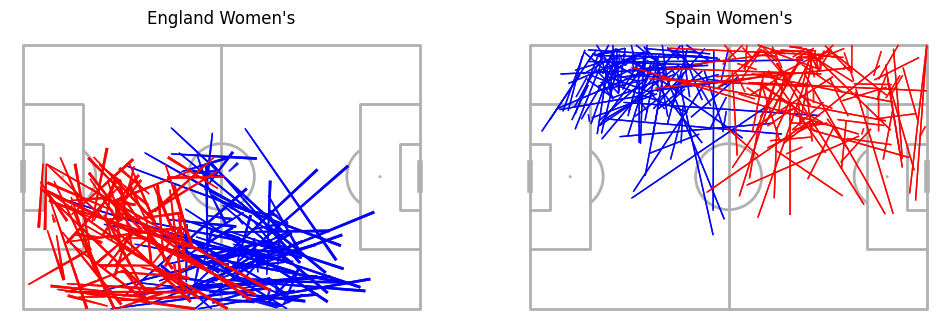

In [41]:
# Let's plot the clusters
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pitch = Pitch(pitch_type='statsbomb')

colors = ['blue', 'red']

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('England Women\'s')
pitch.draw(ax=ax1)

for i, cluster in enumerate(df1['cluster'].unique()):
    pitch.lines(
        df1[df1['cluster'] == cluster]['x'], 
        df1[df1['cluster'] == cluster]['y'],
        df1[df1['cluster'] == cluster]['end_x'], 
        df1[df1['cluster'] == cluster]['end_y'],
        lw=2,
        comet=True, 
        color=colors[i], 
        ax=ax1
    )
    
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Spain Women\'s')
pitch.draw(ax=ax2)

for i, cluster in enumerate(df2['cluster'].unique()):
    pitch.lines(
        df2[df2['cluster'] == cluster]['x'], 
        df2[df2['cluster'] == cluster]['y'],
        df2[df2['cluster'] == cluster]['end_x'], 
        df2[df2['cluster'] == cluster]['end_y'],
        lw=1,
        comet=True, 
        color=colors[i], 
        ax=ax2
    )

That is a simple exmpale of clustering passes

To improve the clustering we could use more features such as the angle of the pass, the distance of the pass, the speed of the pass, etc. We could also experiment with different numbers of clusters to see which one gives the best results.

We also could look at ways to evaluate the types of passes such as only looking at progressive passes or passes that lead to a shot.
